# Assignment 10

Please fill in blanks in the *Answer* sections of this notebook. To check your answer for a problem, run the Setup, Answer, and Result sections. DO NOT MODIFY SETUP OR RESULT CELLS. See the [README](https://github.com/mortonne/datascipsych) for instructions on setting up a Python environment to run this notebook.

Write your answers for each problem. Then restart the kernel, run all cells, and then save the notebook. Upload your notebook to Canvas.

If you get stuck, read through the other notebooks in this directory, ask us for help in class, or ask other students for help in class or on the weekly discussion board.

## Problem: making a bar plot (2 points)

### Calculate mean response by trial type (1 point)

Read the `gen_recog.csv` file into a DataFrame. Calculate the mean response for each combination of subject and trial type. Save the result to a variable called `response`.

### Make a bar plot with error bars (1 point)

Given your `response` DataFrame, use Seaborn's `catplot` function to create a bar plot with trial type on the x-axis and response on the y-axis, with error bars showing variability across subjects. You should have one bar for each trial type. Assign the `FacetGrid` output to a variable called `g1`.

### Setup

In [126]:
import polars as pl
import seaborn as sns
from IPython.display import display
response = None
g1 = None

### Answer

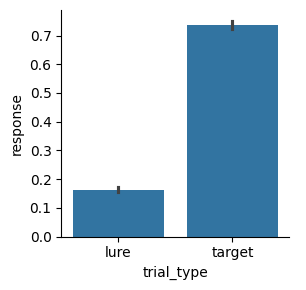

In [127]:

df = pl.read_csv("gen_recog.csv")

response = (
    df.group_by(["subject", "trial_type"])
      .agg(pl.col("response").mean())
      .sort(["subject", "trial_type"])
)

response_pd = response.to_pandas()

import seaborn as sns
g1 = sns.catplot(
    data=response_pd,
    x="trial_type",
    y="response",
    kind="bar",
    height=3
)

### Result

In [128]:
vars = [response, g1]
if all([v is not None for v in vars]):
    # this should print your variables
    with pl.Config(tbl_rows=50):
        display(response.sort("subject", "trial_type").head())
    print(g1)
    
    # this should not throw any errors
    assert isinstance(g1, sns.FacetGrid)


subject,trial_type,response
str,str,f64
"""subj01""","""lure""",0.208333
"""subj01""","""target""",0.745
"""subj02""","""lure""",0.156667
"""subj02""","""target""",0.716667
"""subj03""","""lure""",0.16


## Problem: making a histogram (2 points)

Given the `response_study_time` DataFrame (defined below), use Seaborn's `displot` function to create three histograms in different columns showing how target responses vary across participants. Each histogram should have `response` on the x-axis and Count on the y-axis. Make one histogram for each of the study times (1, 2, or 4 seconds; this information is in the `study_time` column). You should have one figure with three subplots, each of which has one histogram showing counts of the `response` variable. Assign the output from `displot`, a `FacetGrid` object, to a variable called `g2`.

### Setup

In [129]:
response_study_time = (
    pl.read_csv("gen_recog.csv")
    .filter(pl.col("trial_type") == "target")
    .group_by("subject", "study_time")
    .agg(pl.col("response").mean())
)
g2 = None

### Answer

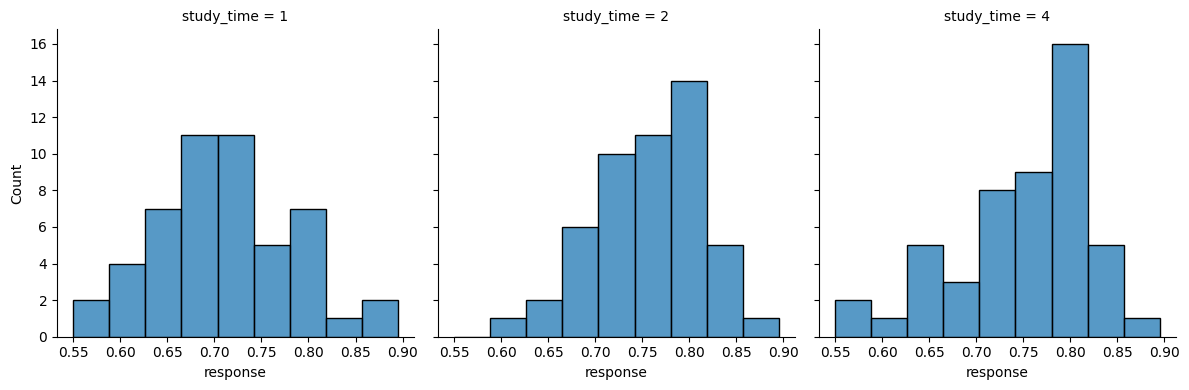

In [130]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt


response_study_time_pd = response_study_time.to_pandas()

g2 = sns.displot(
    data=response_study_time_pd,
    x="response",
    col="study_time",
    kind="hist",
    height=4,
    aspect=1
)

plt.show()


### Result

In [131]:
vars = [g2]
if all([v is not None for v in vars]):
    # this should print your variables
    print(g2)
    
    # this should not throw any errors
    assert isinstance(g2, sns.FacetGrid)

## Problem: making a kernel density estimate plot (2 points)

Given the `response_st` DataFrame (defined below), use Seaborn's `displot` function to create a kernel density estimate (KDE) plot showing how target responses vary based on whether items were studied for 1, 2, or 4 seconds. The x-axis should represent the `response` variable and the y-axis should indicate Density. Assign each study time to a different hue. Use the "flare" palette. You should have just one plot with multiple lines. Assign the output from `displot`, a `FacetGrid` object, to a variable called `g3`.

### Setup

In [132]:
response_st = (
    pl.read_csv("gen_recog.csv")
    .filter(pl.col("trial_type") == "target")
    .group_by("subject", "study_time")
    .agg(pl.col("response").mean())
)
g3 = None

### Answer

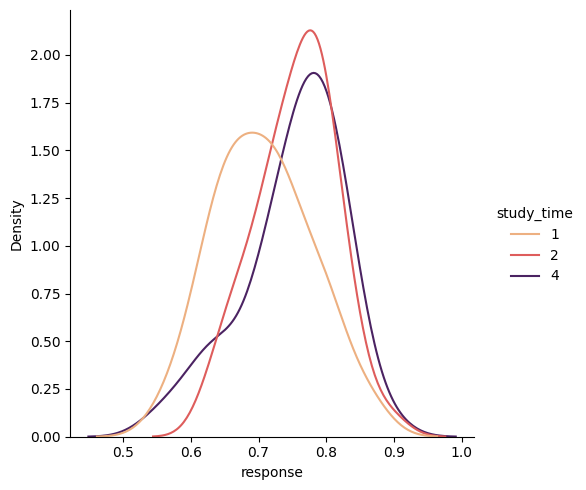

In [133]:
response_st_pd = response_st.to_pandas()

g3 = sns.displot(
    data=response_st_pd,
    x="response",
    kind="kde",
    hue="study_time",
    palette="flare"
)


### Result

In [134]:
vars = [g3]
if all([v is not None for v in vars]):
    # this should print your variables
    print(g3)
    
    # this should not throw any errors
    assert isinstance(g3, sns.FacetGrid)

## Problem: making a grouped bar plot (2 points)

### Make a grouped bar plot (1.5 points)

Given the `response_st_tt` DataFrame (defined below), use Seaborn's `catplot` function to plot how "old" response rate varies with study time (1, 2, or 4 seconds) and trial type (target or lure). The study time should be shown on the x-axis and the trial type should correspond to hue. You should have one plot with six bars with error bars. Assign the `FacetGrid` output to a variabled called `g4`.

### Set the axis labels (0.5 points)

Use the `set_axis_labels` method of the FacetGrid to set the label of the x-axis to "Study time (s)" and the label of the y-axis to "P(old)".

### Setup

In [135]:
response_st_tt = (
    pl.read_csv("gen_recog.csv")
    .group_by("subject", "study_time", "trial_type")
    .agg(pl.col("response").mean())
)
g4 = None

### Answer

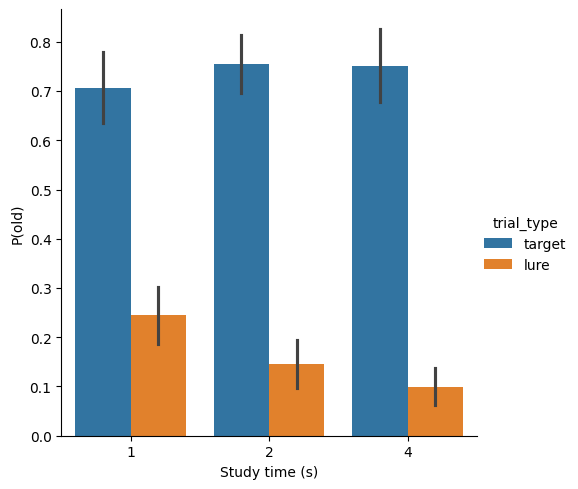

In [136]:
response_st_tt_pd = response_st_tt.to_pandas()

g4 = sns.catplot(
    data=response_st_tt_pd,
    x="study_time",
    y="response",
    hue="trial_type",
    kind="bar",
    errorbar="sd"
)

g4.set_axis_labels("Study time (s)", "P(old)")


### Result

In [137]:
vars = [g4]
if all([v is not None for v in vars]):
    # this should print your variables
    print(g4)
    
    # this should not throw any errors
    assert isinstance(g4, sns.FacetGrid)

## Problem: making a grid of line plots (2 points)

### Make a line plot (1.5 points)

Given the `response_st_tt_it` DataFrame (defined below), use Seaborn's `relplot` function to make a line plot showing how "old" response rate varies with study time (1, 2, or 4 seconds), trial type (target or lure), and item type (word or picture). The study time should be shown on the x-axis, trial type should correspond to hue, and column should correspond to item type. You should have two plots, each of which should have two lines. Assign the `FacetGrid` output to a variabled called `g5`.

### Set the limit of the y-axis (0.5 points)

Use the `set` method of the FacetGrid with the `ylim` input to set the limits of the y-axis to range from 0 to 1.

### Setup

In [138]:
response_st_tt_it = (
    pl.read_csv("gen_recog.csv")
    .group_by("subject", "study_time", "trial_type", "item_type")
    .agg(pl.col("response").mean())
)
g5 = None

### Answer

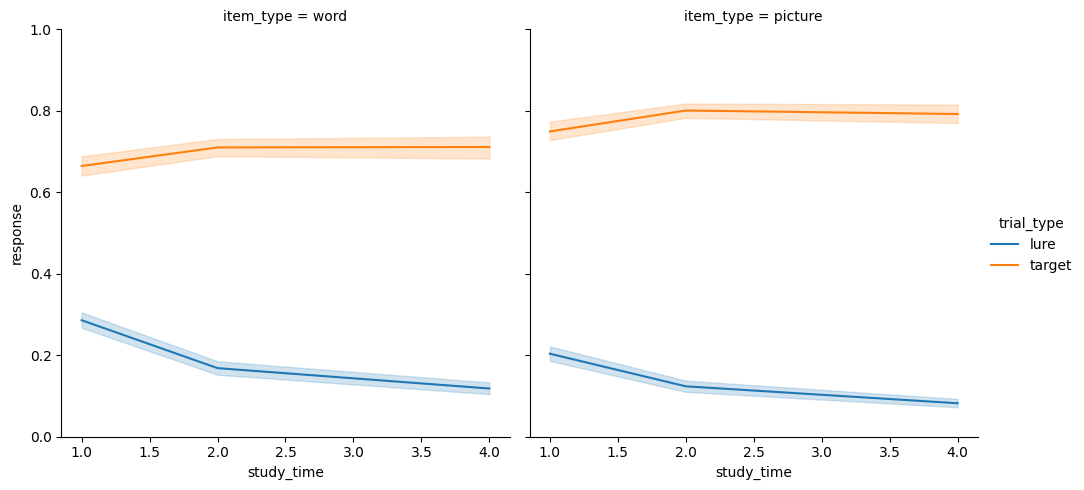

In [139]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

response_st_tt_it = (
    pl.read_csv("gen_recog.csv")
    .group_by(["subject", "study_time", "trial_type", "item_type"])
    .agg(pl.col("response").mean())
)

response_st_tt_it_pd = response_st_tt_it.to_pandas()

g5 = sns.relplot(
    data=response_st_tt_it_pd,
    x="study_time",
    y="response",
    hue="trial_type",
    kind="line",
    col="item_type"
)

g5.set(ylim=(0, 1))

plt.show()


### Result

In [140]:
vars = [g5]
if all([v is not None for v in vars]):
    # this should print your variables
    print(g5)
    
    # this should not throw any errors
    assert isinstance(g5, sns.FacetGrid)

## Problem: making a scatter plot (2 points)

### Reshape the data (0.5 points)

The `perf` DataFrame defined below has corrected recognition performance, which is the hit rate minus the false alarm rate.

Use the `pivot` method to create a new DataFrame with `subject`, `word`, and `picture` columns, with corrected recognition performance from the `performance` column of the `perf` DataFrame. There should be one row for each subject. Assign the pivoted DataFrame to a variable called `table`.

### Create a scatter plot (1 point)

Use Seaborn's `relplot` function to make a scatter plot of how corrected recognition performance in the picture condition (on the x-axis) varies with corrected recognition performance in the word condition (on the y-axis).

### Set the axis limits (0.5 points)

Use the `set` method of the `FacetGrid` with the `xlim` and `ylim` inputs to set both axis limits to range from 0.3 to 0.8.

### Setup

In [141]:
perf = (
    pl.read_csv("gen_recog.csv")
    .group_by("subject", "trial_type", "item_type")
    .agg(pl.col("response").mean())
    .pivot("trial_type", index=["subject", "item_type"], values="response")
    .with_columns(performance=pl.col("target") - pl.col("lure"))
)
g6 = None

### Answer

In [142]:
# your code here; it should display a plot

### Result

In [143]:
vars = [g6]
if all([v is not None for v in vars]):
    # this should print your variables
    print(g6)
    
    # this should not throw any errors
    assert isinstance(g6, sns.FacetGrid)

## Problem (graduate students): using Seaborn's objects interface (2 points)

Read about the new [objects interface](https://seaborn.pydata.org/tutorial/objects_interface.html) for Seaborn, which provides a more flexible way of creating plots with multiple layers.

Use the objects interface with the `response_tt` DataFrame defined below to create a bar plot using the `Bar` mark and the `Agg` transformation, with trial type on the x-axis and response on the y-axis. 

You should have one plot with two bars. Set the label for the x-axis to "Trial type" and the label for the y-axis to "P(old)".

### Setup

In [144]:
import seaborn.objects as so
response_tt = (
    pl.read_csv("gen_recog.csv")
    .group_by("subject", "trial_type")
    .agg(pl.col("response").mean())
)

### Answer

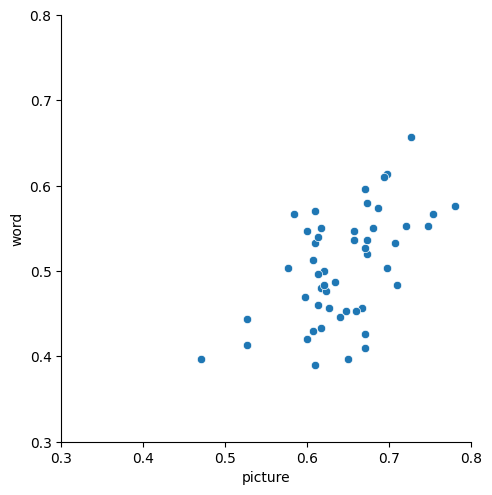

In [147]:
table = perf.pivot(
    values="performance",
    index="subject",
    on="item_type"
).to_pandas()

g6 = sns.relplot(
    data=table,
    x="picture",
    y="word",
    kind="scatter"
)

g6.set(xlim=(0.3, 0.8), ylim=(0.3, 0.8))


### Result

Your code should just create a plot; there is no other output to check.

## Problem (graduate students): making a strip plot (2 points)

Create a strip plot using a `Dot` mark with the `Dodge` and `Jitter` operations (with a jitter of 0.3). See [this section](https://seaborn.pydata.org/tutorial/objects_interface.html#resolving-overplotting) of the documentation for an example of using jitter.

Use the Seaborn objects interface with the `response_it_tt` DataFrame defined below to create a strip plot using the `Dot` mark with the `Dodge` and `jitter` operations (with 0.3 jitter), with study time on the x-axis, response on the y-axis, and trial type represented by color. Set the `alpha` property of the `Dot` mark to 0.5. Set the label for the x-axis to "Item type", the label for the y-axis to "P(old)", and the label for the color legend to "Trial type".

You should have one plot with four groups of dots.

### Setup

In [ ]:
response_it_tt = (
    pl.read_csv("gen_recog.csv")
    .group_by("subject", "item_type", "trial_type")
    .agg(pl.col("response").mean())
)

### Answer

In [ ]:
# your code here; it should display a plot

### Result

Your code should just create a plot; there is no other output to check.

## Problem (graduate students): making bar plots with error bars (2 points)

Create a set of bar plots with error bars. Use the `Bar` mark with `Agg` and `Dodge` to make the bars. To make the error bars, add a `Range` mark with the `Est` function and the `Dodge` operation. Use the default values of the `Est` function, which will generate 95% bootstrap confidence intervals. See [this section](https://seaborn.pydata.org/tutorial/objects_interface.html#creating-variables-through-transformation) of the documentation for an example of estimating error. To make subplots, use the `facet` method. See [this section](https://seaborn.pydata.org/tutorial/objects_interface.html#customizing-limits-labels-and-titles) for examples.

Use the Seaborn objects interface with the `response_it_tt_st` DataFrame defined below to create a set of bar plots with error bars, using `Bar` and `Range` marks, with item type on the x-axis, response on the y-axis, trial type represented by color, and different study times plotted in different columns. Set the `linewidth` property of the `Range` mark to 4. Set the label for the x-axis to "Item type", the label for the y-axis to "P(old)", and the label for the color legend to "Trial type". Set the titles of the subplots to be "1 s", "2 s", and "4 s" using the `format` function (see [here](https://seaborn.pydata.org/tutorial/objects_interface.html#customizing-limits-labels-and-titles) for an example of this approach).

You should have three plots in different columns, with four bars in each plot.

### Setup

In [ ]:
response_it_tt_st = (
    pl.read_csv("gen_recog.csv")
    .group_by("subject", "item_type", "trial_type", "study_time")
    .agg(pl.col("response").mean())
)

### Answer

In [ ]:
# your code here; it should display a plot

### Result

Your code should just create a plot; there is no other output to check.

## Problem (graduate students): making a plot with error and individual points (2 points)

Make a composite plot with bars, error bars, and individual data points plotted in a strip. Use the `Shift` [function](https://seaborn.pydata.org/generated/seaborn.objects.Shift.html#seaborn.objects.Shift) to avoid overplotting the strip plots and the error bars.

Use the Seaborn objects interface with the `response_it_tt` DataFrame defined below to create a composite plot with bars, error bars, and individual data points, with study time on the x-axis, respose on the y-axis, and trial type represented by color. Shift the error bars by 0.05 (to the right), and the points by -0.05 (to the left). Set the jitter to 0.05. Set the `alpha` property of the `Bar` mark to 0.4 to make the other elements easier to see. Set the `linewidth` property of the `Range` mark to 4. Set the label for the x-axis to "Item type", the label for the y-axis to "P(old)", and the label for the color legend to "Trial type".

You should have one plot with four bars. Each bar should also have a strip plot showing individual points on the left side of the bar and an error bar on the right side of the bar showing the 95% bootstrap confidence interval.

### Setup

In [ ]:
response_it_tt = (
    pl.read_csv("gen_recog.csv")
    .group_by("subject", "item_type", "trial_type")
    .agg(pl.col("response").mean())
)

### Answer

In [ ]:
# your code here; it should display a plot

### Result

Your code should just create a plot; there is no other output to check.